<a href="https://colab.research.google.com/github/djordjevicivana/PPPO/blob/main/SegmentacijaUltrazvukaIT592019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student: Đorđević Ivana, Br. indeksa: IT59/2019

Segmentacija mašinskog učenja na ultrazvučnim slikama je vredna tehnika koja se koristi u medicinskom snimanju za različite primene, kao što su lokalizacija organa, detekcija tumora i merenje anatomskih struktura. Segmentacija ultrazvučne slike uključuje proces podele ultrazvučne slike na različite regione ili segmente, obično da bi se identifikovale i ocrtale strukture od interesa.

Vrste segmentacije slika su:

- semantička segmentacija - izdvaja region i ceo objekat
- segmentacija instance - pronalazi ivice objekta i označava svaki od njih posebno



Set podataka:
Dati set podataka sadrži dva foldera koji se koriste za treniranje i testiranje modela. Train folder sadrži pored slika ultrazvuka i maske sa identifikovanim nervom. Model koji će se koristiti je U-Net konvulcijska mreža koja se može posmatrati kao mreža enkodera koju prati mreža dekodera

Zaključak:
Cilj izrade projekta je razumevanje koncepta segmentacije kao jednog od često korišćenih udubokom učenju.

Prilikom izrade došlo je do boljeg razumevanja konvulcionih mreža i načina na koji one funkcionišu, kao i do boljeg razumevanja seta podataka. U budućnosti postoji prostor za napredak potencijalno korišćenjem nekog drugog modela.

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/u/0/uc?id=1PRazw6hFwo1qKXqb4RQYwtQL-c83XUja&export=download' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo" -O dataset.zip && rm -rf /tmp/cookies.txt

--2023-09-08 14:12:42--  https://docs.google.com/uc?export=download&confirm=t&id=1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo
Resolving docs.google.com (docs.google.com)... 142.250.128.139, 142.250.128.113, 142.250.128.102, ...
Connecting to docs.google.com (docs.google.com)|142.250.128.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l9fj4ke5ap6m9l5fsd31fs85sfiiahkl/1694182350000/12749817884604637057/*/1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo?e=download&uuid=9fba7eaa-c900-420f-9330-464aec5699ba [following]
--2023-09-08 14:12:42--  https://doc-0g-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l9fj4ke5ap6m9l5fsd31fs85sfiiahkl/1694182350000/12749817884604637057/*/1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo?e=download&uuid=9fba7eaa-c900-420f-9330-464aec5699ba
Resolving doc-0g-3c-docs.googleusercontent.com (doc-0g-3c-docs.googleusercontent.com)... 209.85.146.1

Ovde smo učitali i unzipovali podatke

In [ ]:
!unzip dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/34_115.tif        
  inflating: train/34_115_mask.tif   
  inflating: train/34_116.tif        
  inflating: train/34_116_mask.tif   
  inflating: train/34_117.tif        
  inflating: train/34_117_mask.tif   
  inflating: train/34_118.tif        
  inflating: train/34_118_mask.tif   
  inflating: train/34_119.tif        
  inflating: train/34_119_mask.tif   
  inflating: train/34_11_mask.tif    
  inflating: train/34_12.tif         
  inflating: train/34_12_mask.tif    
  inflating: train/34_13.tif         
  inflating: train/34_13_mask.tif    
  inflating: train/34_14.tif         
  inflating: train/34_14_mask.tif    
  inflating: train/34_15.tif         
  inflating: train/34_15_mask.tif    
  inflating: train/34_16.tif         
  inflating: train/34_16_mask.tif    
  inflating: train/34_17.tif         
  inflating: train/34_17_mask.tif    
  inflating: train/34_18.tif         
  inflating: train/34_18_mask.tif    

Nakon što smo učitali podakte, sada je potrebno da učitamo i potrebne biblioteke.

In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models.pytorch

  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-ed0l38fw
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-ed0l38fw
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit 6db76a1106426ac5b55f39fba68168f3bccae7f8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.8 MB/s eta 0:00:00
  Created wheel for segmentation-models-pytorch: filename=segmentation_models_pytorch-0.3.3-py3-none-any.whl size=10

Nakon dodatih biblioteka, dodajemo potrebne module za manipulaciju podacima, vizualizaciju i kreiranje neuronskih mreža(konkretno torch moduli), podrška za GPU i tako dalje.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms

In [ ]:
train_masks = pd.read_csv("train_masks.csv")

In [ ]:
train_masks.head(10)

,subject,img,pixels
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...
4,1,5,NaN
5,1,6,NaN
6,1,7,172767 15 173175 29 173591 34 173993 7 174004 ...
7,1,8,NaN
8,1,9,NaN
9,1,10,NaN


Sada ćemo proveriti osnovne informacije o ovom fajlu, npr. koliko not-null, odnosno koliko null vrednosti ima.

In [ ]:
train_masks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  5635 non-null   int64 
 1   img      5635 non-null   int64 
 2   pixels   2323 non-null   object
dtypes: int64(2), object(1)
memory usage: 132.2+ KB


In [ ]:
train_masks.isna().sum()

subject       0
img           0
pixels     3312
dtype: int64

Slike koje nemaju masku nemaju ni nerve detektovane na njima, sada zbrajamo koliko slika ima masku a koliko nema kako bismo videli odnos tih vrednosti.

In [ ]:
nerve = (train_masks['pixels'][train_masks['pixels']!= 'NaN'].count())
no_nerve = (train_masks['img'].count() - nerve)

print('Nerves detected', nerve )
print('No nerves detected', no_nerve)

Nerves detected 2323
No nerves detected 3312


Text(0, 0.5, 'Number')

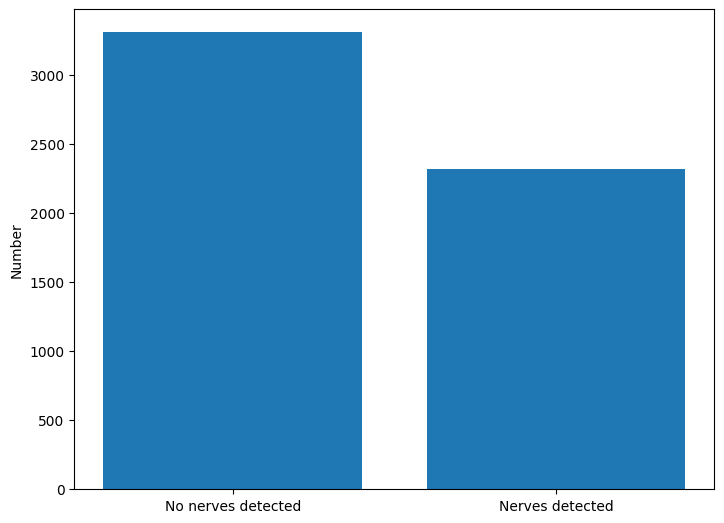

In [ ]:
plot = plt.figure()
axs = plot.add_axes([0,0,1,1])
x = ['No nerves detected', 'Nerves detected']
labels = [no_nerve, nerve]
axs.bar(x, labels)
plt.ylabel("Number")

Na prethodnom histogramu vizuelno je prikazana razlika između slika sa nervima i slika bez njih.

Za praćenje validation loss-a koji nam je potreban predstavićemo još par biblioteka, Early stopping i pickle.

Early stopping nam služi da prekine proces učenja modela kada se rezultati ne poboljšavaju znatno, ovde će pratiti validation loss

Pickle nam služi da implementira binarne protokole za serijalizaciju i deserijalizaciju objekata, prvo serijalizuje objekat pa ga tek onda upiše u datoteku.

In [ ]:
!git clone https://github.com/Bjarten/early-stopping-pytorch.git es

Cloning into 'es'...
remote: Enumerating objects: 92, done.
remote: Total 92 (delta 0), reused 0 (delta 0), pack-reused 92
Receiving objects: 100% (92/92), 533.89 KiB | 3.92 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [ ]:
from es.pytorchtools import EarlyStopping

In [ ]:
def checkpoint(self, val_loss, model):
    import pickle
    if self.verbose:
        self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model...')
    with open(self.path, 'wb') as f:
        pickle.dump(model, f)
    self.val_loss_min = val_loss

In [ ]:
EarlyStopping.save_checkpoint = checkpoint

Sada kreiramo razdvojene putanje za testiranje i treiranje za lakšu manipulaciju prilikom pozivanja.

In [ ]:
train_path = 'train'
test_path = 'test'

train_csv = 'train_annotation.csv'

In [ ]:
from PIL import Image

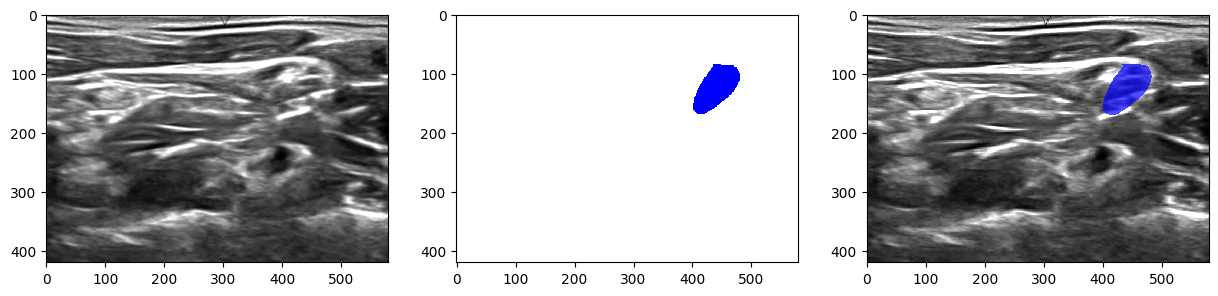

In [ ]:
img = np.array(Image.open("train/"+"1_1.tif"))
img_mask = np.array(Image.open("train/"+"1_1_mask.tif"))
img_mask = np.ma.masked_where(img_mask == 0, img_mask)

fig, ax = plt.subplots(1, 3, figsize = (15, 15))
ax[0].imshow(img, cmap = "gray")

ax[1].imshow(img_mask, cmap = "winter")

ax[2].imshow(img, cmap = "gray", interpolation = "none")
ax[2].imshow(img_mask, cmap = "winter", interpolation = "none", alpha = 0.7)

Sada smo isčitali prvu sliku iz train seta i njenu masku, zatim smo na trećoj slici prikazali gde je detektovan nerv. Sada se na vizuelnom primeru jasnije razume set podataka. U sledećem koraku ćemo u csv fajlu zapisivati slike i njihove odgovarajuće maske.

In [ ]:
def csv(data_path, out_csv_path, key_word='mask'):
    to_delete = f'_{key_word}'

    for file_name in os.listdir(data_path):
        if key_word in file_name:
            img = file_name.replace(to_delete, '')
            data = pd.DataFrame([img], index=['img']).transpose()
            data.insert(0, 'mask', file_name)

            if not os.path.exists(out_csv_path):
                data.to_csv(out_csv_path, header=True, index=False)
            else:
                data.to_csv(out_csv_path, mode='a', header=False, index=False)

In [ ]:
csv(data_path=train_path, out_csv_path=train_csv)

Sada kreiramo set podataka za sam model gde smeštamo učitane slike i odgovarajuće maske.

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, df, root_dir, transform=None):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        mask = Image.open(os.path.join(self.root_dir, self.df.iloc[idx, 0]))
        image = Image.open(os.path.join(self.root_dir, self.df.iloc[idx, 1]))

        if self.transform:
            return self.transform(image), self.transform(mask)

        return image, mask

In [ ]:
train_df = pd.read_csv(train_csv)

In [ ]:
train_df.head(10)

,mask,img
0,13_119_mask.tif,13_119.tif
1,43_104_mask.tif,43_104.tif
2,18_73_mask.tif,18_73.tif
3,28_112_mask.tif,28_112.tif
4,40_61_mask.tif,40_61.tif
5,42_24_mask.tif,42_24.tif
6,39_12_mask.tif,39_12.tif
7,28_117_mask.tif,28_117.tif
8,16_94_mask.tif,16_94.tif
9,9_100_mask.tif,9_100.tif


Učitavamo prvih deset kodom iznad.

In [ ]:
samples_train = ImageDataset(df=train_df, root_dir=train_path)

Sada vizuelno prikazujemo par primera slika i maski koji su kreirani u prethodnim koracima.

In [ ]:
def samples_display(data, n_col, n_row):
    fig = plt.figure(figsize=(20, 5))

    for i in range(1, n_col + 1):
        img_ax = fig.add_subplot(n_row, n_col, i)
        msk_ax = fig.add_subplot(n_row, n_col, i + n_col)

        img_ax.imshow(data[i-1][0], cmap="gray")
        msk_ax.imshow(data[i-1][1], cmap="gray")

    fig.show()

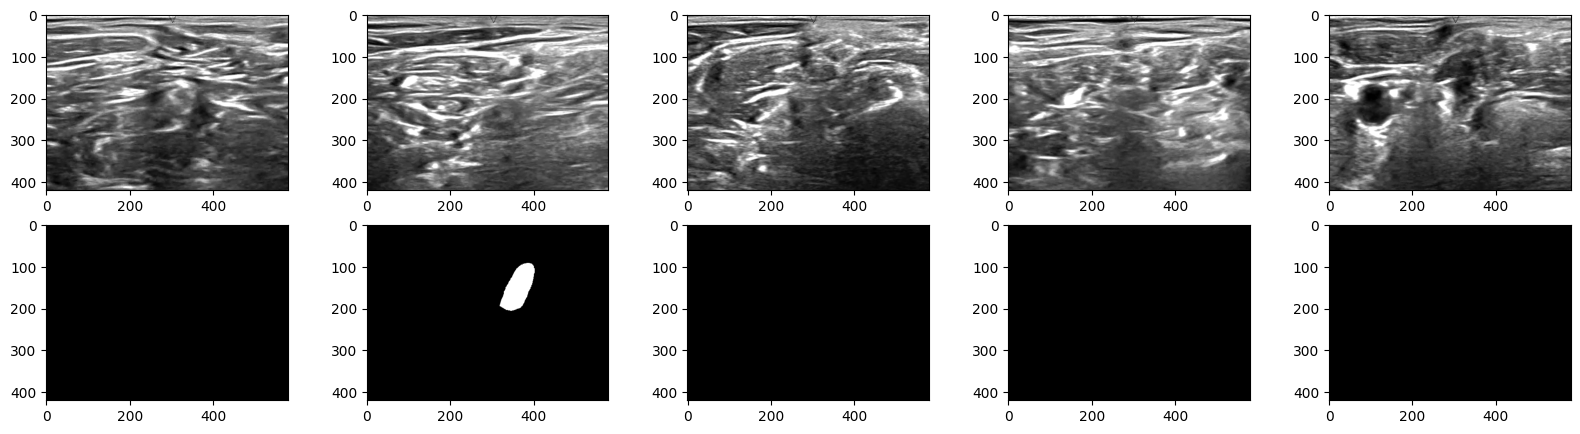

In [ ]:
samples_display(data=samples_train, n_col = 5, n_row = 2)

Ovde vidimo da na 5 fotografija isčitanih, na 2 od njih se detektuje nerv, dalje nastavljamo na pravljenje modela.

In [ ]:
ENCODER = 'vgg11_bn'
ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = 'sigmoid'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Sada se kreira UNet konvulciona mreža uz pomoć prethodno definisanih delova iz segmentation_model_pytorch.

In [ ]:
model = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    in_channels=1,
    classes=1,
    activation=ACTIVATION
)

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth
100%|██████████| 507M/507M [00:08<00:00, 60.9MB/s]


METRIKA-IOU

Intersction over Union koristi se da bi se proverila tačnost detekcije. Ovde ćemo proveravati presek između predikcije i maske. Najbolji rezultat bi bio da je vrednost metrike približna 1 jer bi to značilo da je model dobar.

In [ ]:
import segmentation_models_pytorch.utils as smpu

In [ ]:
loss = smpu.losses.DiceLoss()
metrics = [smpu.metrics.IoU()]
optimizer = torch.optim.Adam
scheduler = lr_scheduler.StepLR

In [ ]:
def split_df(df, fraction=0.8):
    df_1 = df.sample(frac=fraction)
    return df_1, df.drop(df_1.index)

In [ ]:
my_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [ ]:
def train(model, train_df, train_dir, optimizer, loss, metrics,
          learning_rate=0.01, batch_size=15, epochs=20, patience=3,
          scheduler=None, step_size=5, gamma=0.1, device='cpu', transform=None):

    early_stopping = EarlyStopping(patience, path='best_model.pkl', verbose=True)
    optimizer = optimizer(model.parameters(), learning_rate)

    if scheduler:
        scheduler = scheduler(optimizer, step_size, gamma)

    train_epoch = smp.utils.train.TrainEpoch(
        model, loss, metrics, optimizer, device, verbose=True
    )

    valid_epoch = smp.utils.train.ValidEpoch(
        model, loss, metrics, device, verbose=True
    )

    train_logs, valid_logs = [], []

    for epoch in range(epochs):
        train_dataframe, val_dataframe = split_df(train_df)

        train_dataset = ImageDataset(train_dataframe, train_dir, transform=transform)

        valid_dataset = ImageDataset(val_dataframe, train_dir, transform=transform)

        train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                   batch_size=batch_size,
                                                   shuffle=True)

        valid_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                   batch_size=batch_size,
                                                   shuffle=False)

        print(f'\nEpoch: {epoch+1}/{epochs}')

        train_log = train_epoch.run(train_loader)
        valid_log = valid_epoch.run(valid_loader)

        train_logs.append(train_log)
        valid_logs.append(valid_log)

        early_stopping(valid_log[loss.__name__], model)

        if early_stopping.early_stop:
            print("Early stopping")
            break

        if scheduler:
            scheduler.step()

    return train_logs, valid_logs

In [ ]:
res = train(model=model,
            train_df=train_df,
            train_dir=train_path,
            optimizer=optimizer,
            loss=loss,
            learning_rate=0.01,
            metrics=metrics,
            batch_size=15,
            epochs=20,
            scheduler=scheduler,
            step_size=10,
            patience=3,
            device=DEVICE,
            transform=my_transforms)

NameError: ignored

In [1]:
import pickle

In [ ]:
with open('results.pkl', 'wb') as f:
    pickle.dump(res, f)

In [ ]:
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [ ]:
train_logs_df = pd.DataFrame(res[0])
valid_logs_df = pd.DataFrame(res[1])

res_dict = {'train': train_logs_df, 'valid': valid_logs_df}

In [ ]:
def draw_graphic(df_dict, title, criteria, xlab, ylab, colors=['y', 'c'],
                 legend_loc='best', figsize=(12, 8), fontsize=14):
    fig = plt.figure(figsize=figsize)
    for i, key in enumerate(df_dict):
        plt.plot(df_dict[key].index.tolist(), df_dict[key][criteria].tolist(), colors[i], lw=3, label=key)
    plt.xlabel(xlab, fontsize=fontsize)
    plt.ylabel(ylab, fontsize=fontsize)
    plt.title(title, fontsize=fontsize)
    plt.legend(loc=legend_loc, fontsize=fontsize)
    plt.grid()

    fig.show()

In [ ]:
draw_graphic(df_dict=res_dict, title='IoU scores', criteria='iou_score', xlab='epochs', ylab='IoU score')

In [ ]:
draw_graphic(df_dict=res_dict, title='Dice Losses', criteria='dice_loss', xlab='epochs', ylab='IoU score')

Ovde radimo nad testnim podacima:

In [3]:
from tqdm.notebook import tqdm

In [ ]:
def rle_encoding(x):
    dots = np.where(x.T.flatten()==1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

In [ ]:
imgs = [f for f in os.listdir(test_path)]
imgs = sorted(imgs, key=lambda s: int(s.split('.')[0]))

In [ ]:
def create_csv_submission(model, data_path, img_list, out_path):
    submission_df = pd.DataFrame(columns=['img', 'pixels'])
    model.to(DEVICE)
    model.eval()

    for i, img in enumerate(tqdm(img_list)):
        x = Image.open(os.path.join(data_path, img))

        x = my_transforms(x)

        x = x.unsqueeze(0).to(DEVICE)
        pred_mask = model.predict(x)

        pred_mask = pred_mask.cpu()
        pred_mask = transforms.Resize(size=(420, 580))(pred_mask)

        encoding = rle_encoding(pred_mask)

        pixels = ' '.join(map(str, encoding))
        submission_df.loc[i] = [str(i+1), pixels]

    submission_df.to_csv(out_path, index=False)

In [ ]:
create_csv_submission(model=model,
                      data_path=test_path,
                      img_list=imgs,
                      out_path='submission.csv')

In [ ]:
test_sub = pd.read_csv("submission.csv")

In [ ]:
test_sub.head(20)